In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.fftpack as spfft
import scipy.signal as spsig
from scipy.io import wavfile

In [2]:
file_path = './10.png'
img = mpimg.imread(file_path)
img_h = img.shape[0]
img_w = img.shape[1]
img_c = img.shape[2]

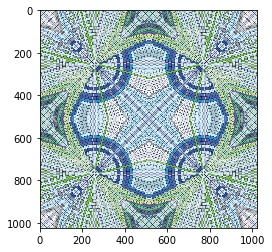

In [3]:
plt.imshow(img)
plt.show()

0.24705882


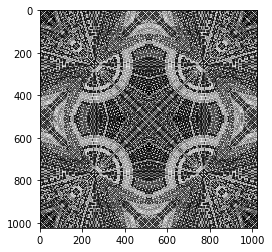

In [4]:
img_sum = np.sum(img, axis=2)
img_sum = img_sum / np.max(img_sum)
plt.imshow(img_sum, cmap='Greys')
print(img_sum[150, 150])
plt.show()

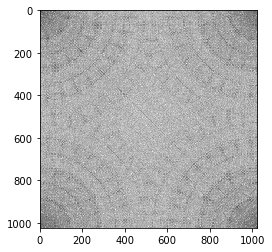

In [5]:
img_fft = np.fft.fft2(img_sum)

img_fft_abs = np.abs(img_fft)
img_fft_m = 20 * np.log10(img_fft_abs)  
plt.imshow(img_fft_m, cmap='Greys')
plt.show()

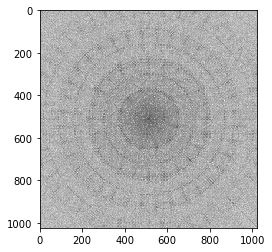

In [6]:
img_fft_swap = np.zeros_like(img_fft)
img_fft_swap[:img_h//2, :img_w//2] = img_fft[img_h//2:, img_w//2:]
img_fft_swap[:img_h//2, img_w//2:] = img_fft[img_h//2:, :img_w//2]
img_fft_swap[img_h//2:, :img_w//2] = img_fft[:img_h//2, img_w//2:]
img_fft_swap[img_h//2:, img_w//2:] = img_fft[:img_h//2, :img_w//2]

img_fft_abs = np.abs(img_fft_swap)
img_fft_m = 20 * np.log10(img_fft_abs)  
plt.imshow(img_fft_m, cmap='Greys')
plt.show()

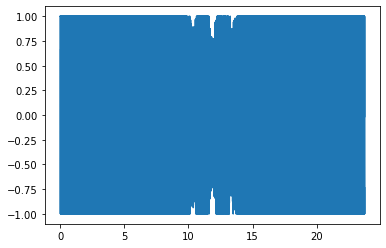

In [7]:
fs = 44100
window = 'blackmanharris'
img_times, img_vals = spsig.istft(img_fft, fs=fs, window=window) 
img_vals = img_vals / img_vals.max() 
img_vals *= 100
img_vals = np.float_power(img_vals, 1.)
img_vals[img_vals > 1.] = 1.
img_vals[img_vals < -1.] = -1.
plt.plot(img_times, img_vals)
plt.show()

In [8]:
img_signal_casted = np.float32(img_vals)
wavfile.write('./1.wav', fs, img_signal_casted)